# Class 3.1 - Bringing Datasets Together

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_csv('data/orders.csv')
df_items = pd.read_csv('data/items.csv')
df_restaurants = pd.read_csv('data/restaurants.csv')

## Combining Datasets: An Introduction

In [3]:
df_full_time = pd.read_excel('data/university.xlsx',
                                 sheet_name='full_time')
df_part_time = pd.read_excel('data/university.xlsx',
                                 sheet_name='part_time')
df_grades = pd.read_excel('data/university.xlsx',
                                 sheet_name='grades')

In [4]:
df_full_time

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan


In [5]:
df_part_time

,student_id,first_name,last_name,adviser
0,5,David,Freeman,Prof Duncan
1,6,Elizabeth,Brown,Prof Duncan
2,7,Amanda,Schultz,Prof Kennedy
3,8,Tanner,Perkins,Prof Alvarez
4,9,Ashley,Gonzales,Prof Kennedy
5,10,Latonya,Porter,Prof Alvarez
6,11,Jacinda,Peterson,Prof Alvarez


In [6]:
df_grades

,student_id,final_grade
0,1,95
1,3,71
2,6,76
3,7,91
4,8,75
5,11,59
6,15,86


## The Five Types of Joins

### Union

In [7]:
df_full_time['student_type'] = 'full_time'
df_part_time['student_type'] = 'part_time'
df_students = pd.concat([df_full_time, df_part_time]).reset_index(drop=True)
df_students

,student_id,first_name,last_name,adviser,student_type
0,1,Melvin,Ware,Prof Duncan,full_time
1,2,Thomas,Moore,Prof Brown,full_time
2,3,Joseph,Paul,Prof Alvarez,full_time
3,4,Sarah,Cruz,Prof Duncan,full_time
4,5,David,Freeman,Prof Duncan,part_time
5,6,Elizabeth,Brown,Prof Duncan,part_time
6,7,Amanda,Schultz,Prof Kennedy,part_time
7,8,Tanner,Perkins,Prof Alvarez,part_time
8,9,Ashley,Gonzales,Prof Kennedy,part_time
9,10,Latonya,Porter,Prof Alvarez,part_time


### Joins: Inner, Outer, Left, and Right

In [8]:
pd.merge(df_grades,
         df_students,
         left_on='student_id',
         right_on='student_id',
         how='inner')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95,Melvin,Ware,Prof Duncan,full_time
1,3,71,Joseph,Paul,Prof Alvarez,full_time
2,6,76,Elizabeth,Brown,Prof Duncan,part_time
3,7,91,Amanda,Schultz,Prof Kennedy,part_time
4,8,75,Tanner,Perkins,Prof Alvarez,part_time
5,11,59,Jacinda,Peterson,Prof Alvarez,part_time


In [9]:
pd.merge(df_grades,
         df_students,
         left_on='student_id',
         right_on='student_id',
         how='left')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95,Melvin,Ware,Prof Duncan,full_time
1,3,71,Joseph,Paul,Prof Alvarez,full_time
2,6,76,Elizabeth,Brown,Prof Duncan,part_time
3,7,91,Amanda,Schultz,Prof Kennedy,part_time
4,8,75,Tanner,Perkins,Prof Alvarez,part_time
5,11,59,Jacinda,Peterson,Prof Alvarez,part_time
6,15,86,NaN,NaN,NaN,NaN


In [10]:
pd.merge(df_grades,
         df_students,
         left_on='student_id',
         right_on='student_id',
         how='right')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95.0,Melvin,Ware,Prof Duncan,full_time
1,2,NaN,Thomas,Moore,Prof Brown,full_time
2,3,71.0,Joseph,Paul,Prof Alvarez,full_time
3,4,NaN,Sarah,Cruz,Prof Duncan,full_time
4,5,NaN,David,Freeman,Prof Duncan,part_time
5,6,76.0,Elizabeth,Brown,Prof Duncan,part_time
6,7,91.0,Amanda,Schultz,Prof Kennedy,part_time
7,8,75.0,Tanner,Perkins,Prof Alvarez,part_time
8,9,NaN,Ashley,Gonzales,Prof Kennedy,part_time
9,10,NaN,Latonya,Porter,Prof Alvarez,part_time


In [11]:
pd.merge(df_grades,
         df_students,
         left_on='student_id',
         right_on='student_id',
         how='outer')

,student_id,final_grade,first_name,last_name,adviser,student_type
0,1,95.0,Melvin,Ware,Prof Duncan,full_time
1,3,71.0,Joseph,Paul,Prof Alvarez,full_time
2,6,76.0,Elizabeth,Brown,Prof Duncan,part_time
3,7,91.0,Amanda,Schultz,Prof Kennedy,part_time
4,8,75.0,Tanner,Perkins,Prof Alvarez,part_time
5,11,59.0,Jacinda,Peterson,Prof Alvarez,part_time
6,15,86.0,NaN,NaN,NaN,NaN
7,2,NaN,Thomas,Moore,Prof Brown,full_time
8,4,NaN,Sarah,Cruz,Prof Duncan,full_time
9,5,NaN,David,Freeman,Prof Duncan,part_time


In [12]:
pd.merge(df_grades,
         df_students[['student_id', 'first_name', 'last_name']],
         left_on='student_id',
         right_on='student_id',
         how='left')

,student_id,final_grade,first_name,last_name
0,1,95,Melvin,Ware
1,3,71,Joseph,Paul
2,6,76,Elizabeth,Brown
3,7,91,Amanda,Schultz
4,8,75,Tanner,Perkins
5,11,59,Jacinda,Peterson
6,15,86,NaN,NaN


## Constructing the Dig Order Dataset

In [13]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [14]:
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [15]:
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


In [16]:
df_orders2 = pd.merge(df_orders,
         df_restaurants[['RESTAURANT_ID', 'NAME']],
         left_on='RESTAURANT_ID',
         right_on='RESTAURANT_ID',
         how='left').rename(columns={'NAME': 'RESTAURANT_NAME'})

In [17]:
df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg


In [18]:
df_orders2 = pd.merge(df_orders2,
         df_items[['ITEM_ID', 'ITEM_NAME']],
         left_on='MAIN',
         right_on='ITEM_ID',
         how='left').rename(columns={'ITEM_NAME':'MAIN_NAME'}).drop(columns='ITEM_ID')

In [19]:
df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl


In [20]:
df_orders2 = pd.merge(df_orders2,
         df_items[['ITEM_ID', 'ITEM_NAME']],
         left_on='BASE',
         right_on='ITEM_ID',
         how='left').rename(columns={'ITEM_NAME':'BASE_NAME'}).drop(columns='ITEM_ID')

In [21]:
df_orders2 = pd.merge(df_orders2,
         df_items[['ITEM_ID', 'ITEM_NAME']],
         left_on='SIDE_1',
         right_on='ITEM_ID',
         how='left').rename(columns={'ITEM_NAME':'SIDE_1_NAME'}).drop(columns='ITEM_ID')

In [22]:
df_orders2 = pd.merge(df_orders2,
         df_items[['ITEM_ID', 'ITEM_NAME']],
         left_on='SIDE_2',
         right_on='ITEM_ID',
         how='left').rename(columns={'ITEM_NAME':'SIDE_2_NAME'}).drop(columns='ITEM_ID')

In [23]:
df_orders2.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


<AxesSubplot:>

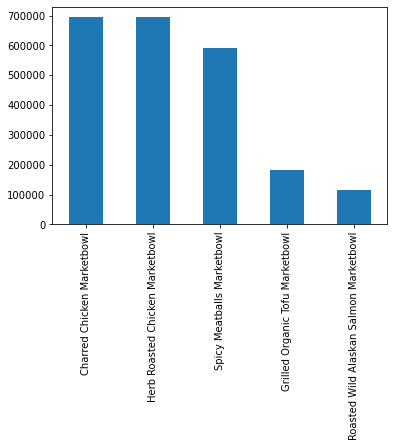

In [24]:
df_orders2.MAIN_NAME.value_counts().plot(kind='bar')

In [25]:
df_orders2.to_csv('data/orders2.csv', index=False)